In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("student_data.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# **Counting Number of Entities**

In [7]:
data['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [8]:
data['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [9]:
data['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [10]:
data['famsize'].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

In [11]:
data['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

In [12]:
data['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

In [13]:
data['failures'].value_counts()

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

In [14]:
data['Mjob'].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

In [15]:
data['Fjob'].value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

#  **Failure**

In [17]:
Fail_0 = data.where(data['failures']==0)
Fail_0 = Fail_0.dropna()
Fail_0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18.0,R,GT3,T,4.0,4.0,teacher,at_home,...,4.0,4.0,3.0,2.0,2.0,5.0,7.0,6.0,5.0,6.0
388,MS,F,18.0,U,LE3,T,3.0,1.0,teacher,services,...,4.0,3.0,4.0,1.0,1.0,1.0,0.0,7.0,9.0,8.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0


In [18]:
Fail_1 = data.where(data['failures']==1)
Fail_1 = Fail_1.dropna()
Fail_1.iloc[0:1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16.0,U,LE3,T,2.0,2.0,other,other,...,3.0,3.0,3.0,1.0,2.0,3.0,25.0,7.0,10.0,11.0


In [19]:
Fail_2 = data.where(data['failures']==2)
Fail_2 = Fail_2.dropna()
Fail_2.iloc[0:1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
25,GP,F,16.0,U,GT3,T,2.0,2.0,services,services,...,1.0,2.0,2.0,1.0,3.0,5.0,14.0,6.0,9.0,8.0


In [20]:
Fail_3 = data.where(data['failures']==3)
Fail_3 = Fail_3.dropna()
Fail_3.iloc[0:1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0


**Failure Outliers**

<Axes: >

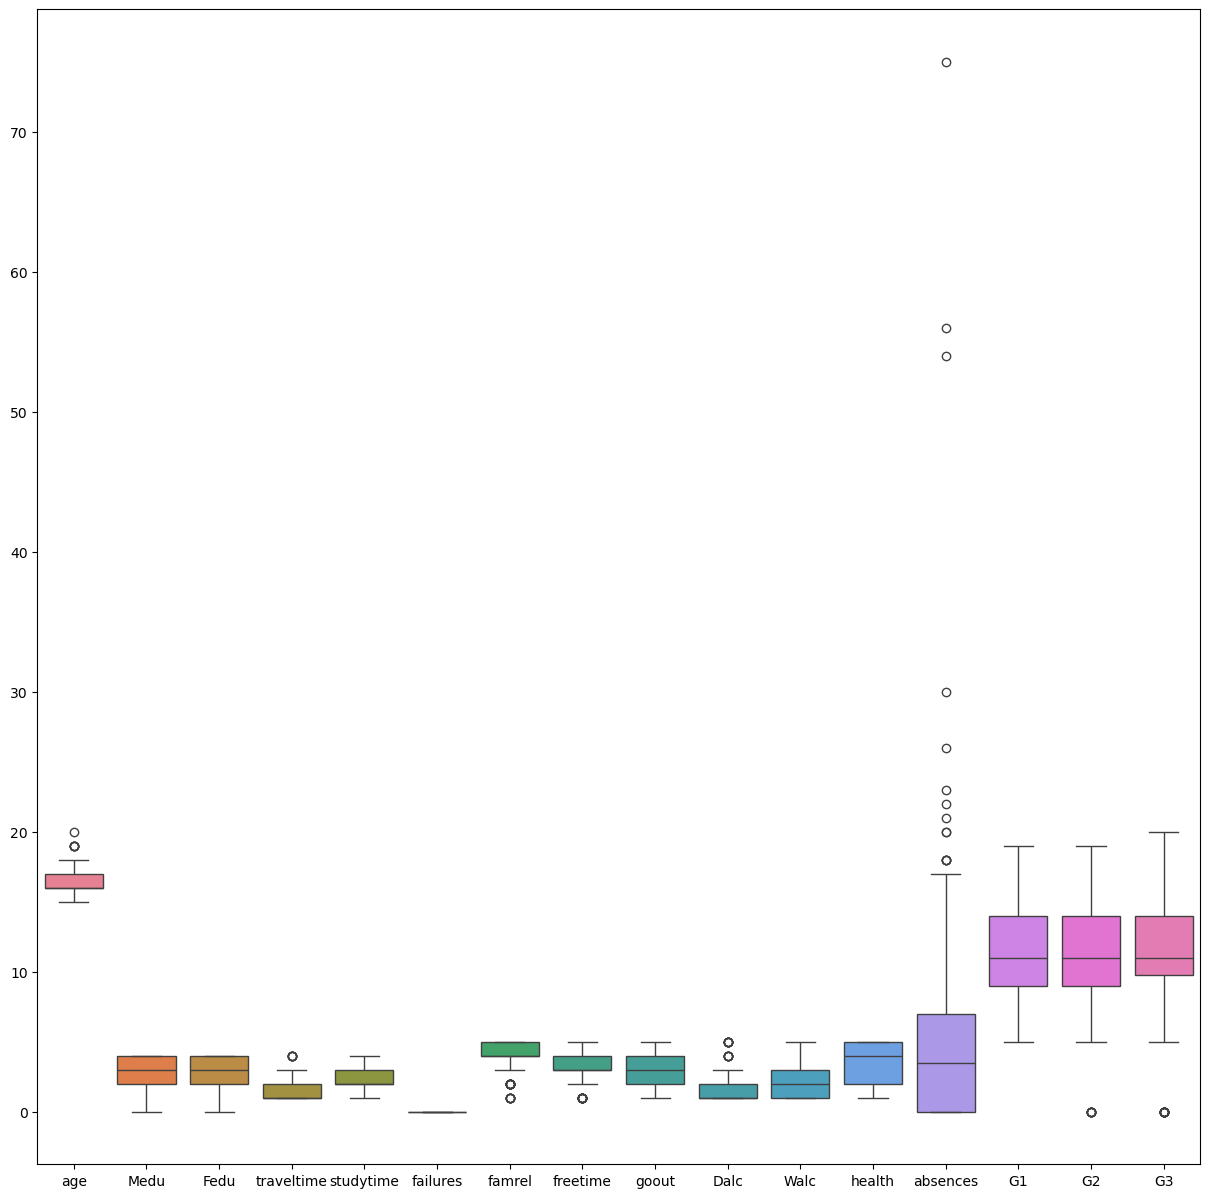

In [22]:
#With Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_0,ax=ax)

> Handling Fail_0 Outliers

In [24]:
Fail_0['age'].value_counts()

age
16.0    88
17.0    84
15.0    71
18.0    63
19.0     5
20.0     1
Name: count, dtype: int64

In [25]:
age_mean = round(Fail_0['age'].mean())
Fail_0['age']=Fail_0['age'].apply(lambda x : age_mean if x>18 else x)

In [26]:
Fail_0['traveltime'].value_counts()

traveltime
1.0    209
2.0     80
3.0     17
4.0      6
Name: count, dtype: int64

In [27]:
Travel_mean = round(Fail_0['traveltime'].mean())
# round(Medu_mean)
Fail_0['traveltime'] = Fail_0['traveltime'].replace(4,Travel_mean)

In [28]:
Fail_0['famrel'].value_counts()

famrel
4.0    151
5.0     88
3.0     54
2.0     13
1.0      6
Name: count, dtype: int64

In [29]:
Famrel_Mean = round(Fail_0['famrel'].mean())
Fail_0['famrel']= Fail_0['famrel'].apply(lambda x:x if x>=3 else Famrel_Mean)

In [30]:
Fail_0['freetime'].value_counts()

freetime
3.0    134
4.0     86
2.0     52
5.0     27
1.0     13
Name: count, dtype: int64

In [31]:
Freetime_Mean = round(Fail_0['freetime'].mean())
Fail_0['freetime']= Fail_0['freetime'].replace(1,Freetime_Mean)

In [32]:
Fail_0['Dalc'].value_counts()

Dalc
1.0    232
2.0     50
3.0     17
5.0      7
4.0      6
Name: count, dtype: int64

In [33]:
Fail_0['Dalc'] = Fail_0['Dalc'].apply(lambda x : x if x<4 else 3)

In [34]:
Absence = Fail_0['absences'].value_counts()
Absence = pd.DataFrame(Absence)
Absence = Absence.reset_index()
Absence

,absences,count
0,0.0,89
1,2.0,58
2,4.0,47
3,6.0,25
4,8.0,17
5,10.0,15
6,12.0,9
7,14.0,8
8,3.0,6
9,7.0,6


In [35]:
Fail_0['absences']=Absence['count'].apply(lambda x:x if x<=2 else round(Fail_0['absences'].mean()))

In [36]:
Fail_0['G2'].value_counts()

G2
10.0    37
9.0     37
15.0    34
12.0    34
13.0    32
11.0    31
14.0    21
8.0     20
16.0    13
18.0    11
7.0     11
6.0      9
0.0      8
5.0      6
17.0     5
19.0     3
Name: count, dtype: int64

In [37]:
G2_Mean = round(Fail_0['G2'].mean())
Fail_0['G2'] = Fail_0['G2'].apply(lambda x:x if x>=8 else G2_Mean)

In [38]:
Fail_0['G3'].value_counts()

G3
10.0    45
11.0    42
15.0    32
14.0    26
13.0    25
12.0    25
9.0     21
0.0     18
8.0     18
16.0    16
6.0     15
18.0    11
17.0     6
19.0     5
5.0      3
7.0      3
20.0     1
Name: count, dtype: int64

In [39]:
G3_Mean = round(Fail_0['G3'].mean())
G3_Mean
Fail_0['G3'] = Fail_0['G3'].apply(lambda x:x if x>6 else G2_Mean)

<Axes: >

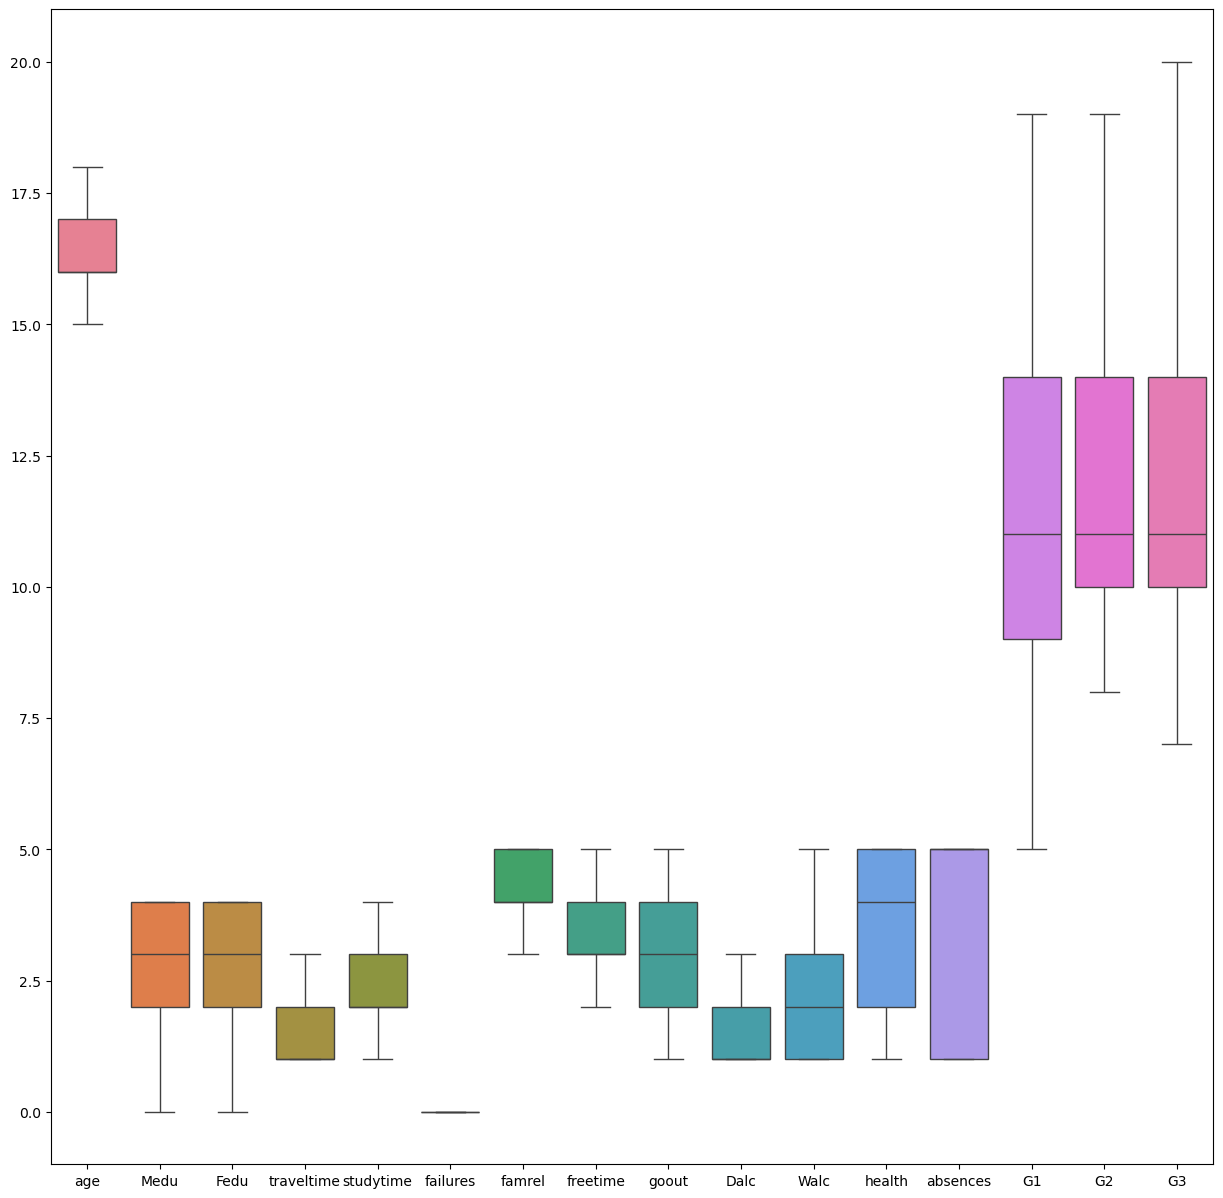

In [40]:
#After Removing Outliers 
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_0,ax=ax)

C:\Users\apurv\AppData\Local\Temp\ipykernel_43148\2969027086.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = Fail_0,kind='kde')


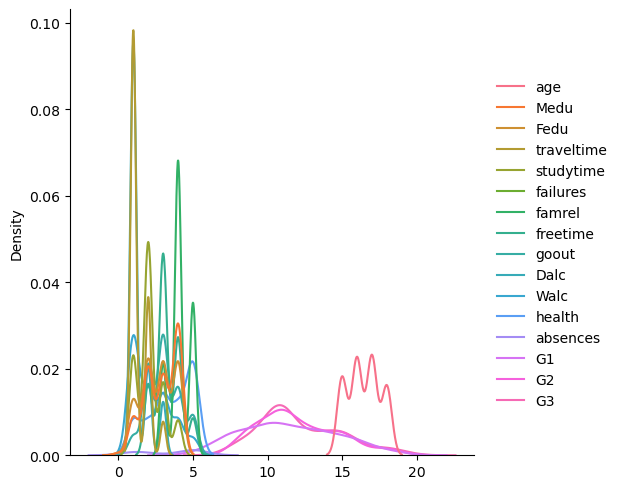

In [41]:
# fig,ax = plt.subplots(figsize = (15,15))
sns.displot(data = Fail_0,kind='kde')

> **Fail_0 Linear Regression**

In [43]:
fail_0_X =  Fail_0.iloc[:,:-1].select_dtypes(include="float64")
fail_0_Y = Fail_0.iloc[:,:-1].select_dtypes(include="float64")

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fail_0_X,fail_0_Y,test_size=0.3,random_state=45)

In [45]:
X_train.dtypes

age           float64
Medu          float64
Fedu          float64
traveltime    float64
studytime     float64
failures      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
dtype: object

In [46]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_norm = scaler.fit_transform(X_train.select_dtypes(include="float64").dropna())

In [47]:
X_train_norm

array([[ 0.71818485, -1.8973666 , -1.15470054,  1.17932379,  0.29559878,
         0.        ,  1.41421356,  0.83205029,  1.336198  ,  3.87298335,
         2.29227953,  1.0059702 , -1.04560405,  0.38646346,  0.10259784],
       [-0.92338052,  0.63245553,  0.        ,  1.17932379,  0.29559878,
         0.        ,  1.41421356,  0.83205029,  0.31814238, -0.25819889,
         0.13483997, -0.23214697,  1.11306237, -0.70472748, -1.12857619],
       [ 0.71818485, -0.63245553,  0.        ,  2.89470384,  0.29559878,
         0.        ,  1.41421356, -0.2773501 , -0.69991324, -0.25819889,
        -0.94387981,  0.38691162, -0.50593744, -1.43218811, -1.12857619],
       [-0.92338052,  0.63245553,  1.15470054, -0.53605627, -1.28092806,
         0.        ,  1.41421356,  0.83205029, -0.69991324, -0.25819889,
        -0.94387981,  1.0059702 , -1.04560405,  0.02273314,  0.92338052],
       [ 0.71818485,  0.63245553,  1.15470054, -0.53605627, -1.28092806,
         0.        ,  0.        ,  0.83205029, 

<Axes: >

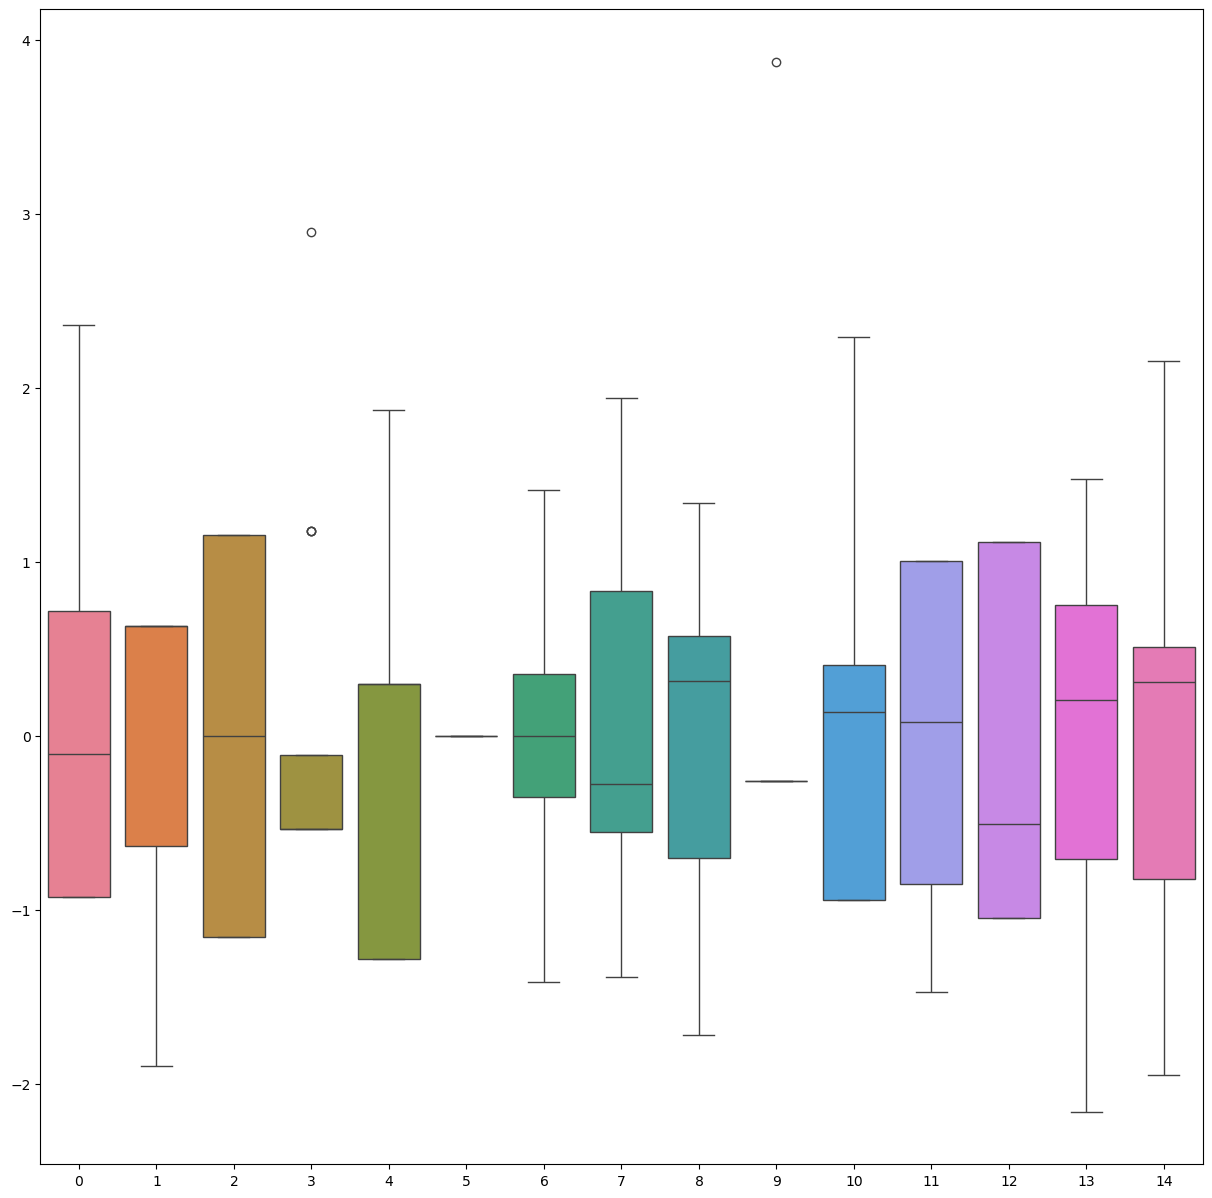

In [48]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_train_norm,ax=ax)

In [49]:
X_test_norm = scaler.transform(X_test.select_dtypes(include="float64").dropna())

In [50]:
X_test_norm

array([[ 4.00131557,  0.63245553,  1.15470054,  1.17932379,  0.29559878,
         0.        ,  0.        , -0.2773501 ,  1.336198  , -0.25819889,
        -0.94387981, -0.23214697,  1.11306237, -2.52337906, -0.71818485],
       [ 0.71818485,  0.63245553,  0.        , -0.53605627,  0.29559878,
         0.        ,  1.41421356,  0.83205029, -0.69991324, -0.25819889,
         0.13483997,  1.0059702 ,  1.11306237,  1.11392409,  0.92338052],
       [-0.92338052, -1.8973666 , -1.15470054, -0.53605627,  1.87212563,
         0.        ,  0.        ,  1.94145069, -0.69991324, -0.25819889,
        -0.94387981, -0.23214697,  1.11306237,  0.75019377,  1.33377186],
       [ 0.71818485, -0.63245553,  0.        , -0.53605627,  0.29559878,
         0.        ,  0.        , -0.2773501 , -0.69991324, -0.25819889,
         0.13483997,  1.0059702 ,  1.11306237, -2.15964874, -1.12857619],
       [ 2.35975021, -3.16227766, -2.30940108, -0.53605627,  0.29559878,
         0.        ,  1.41421356, -0.2773501 , 

<Axes: >

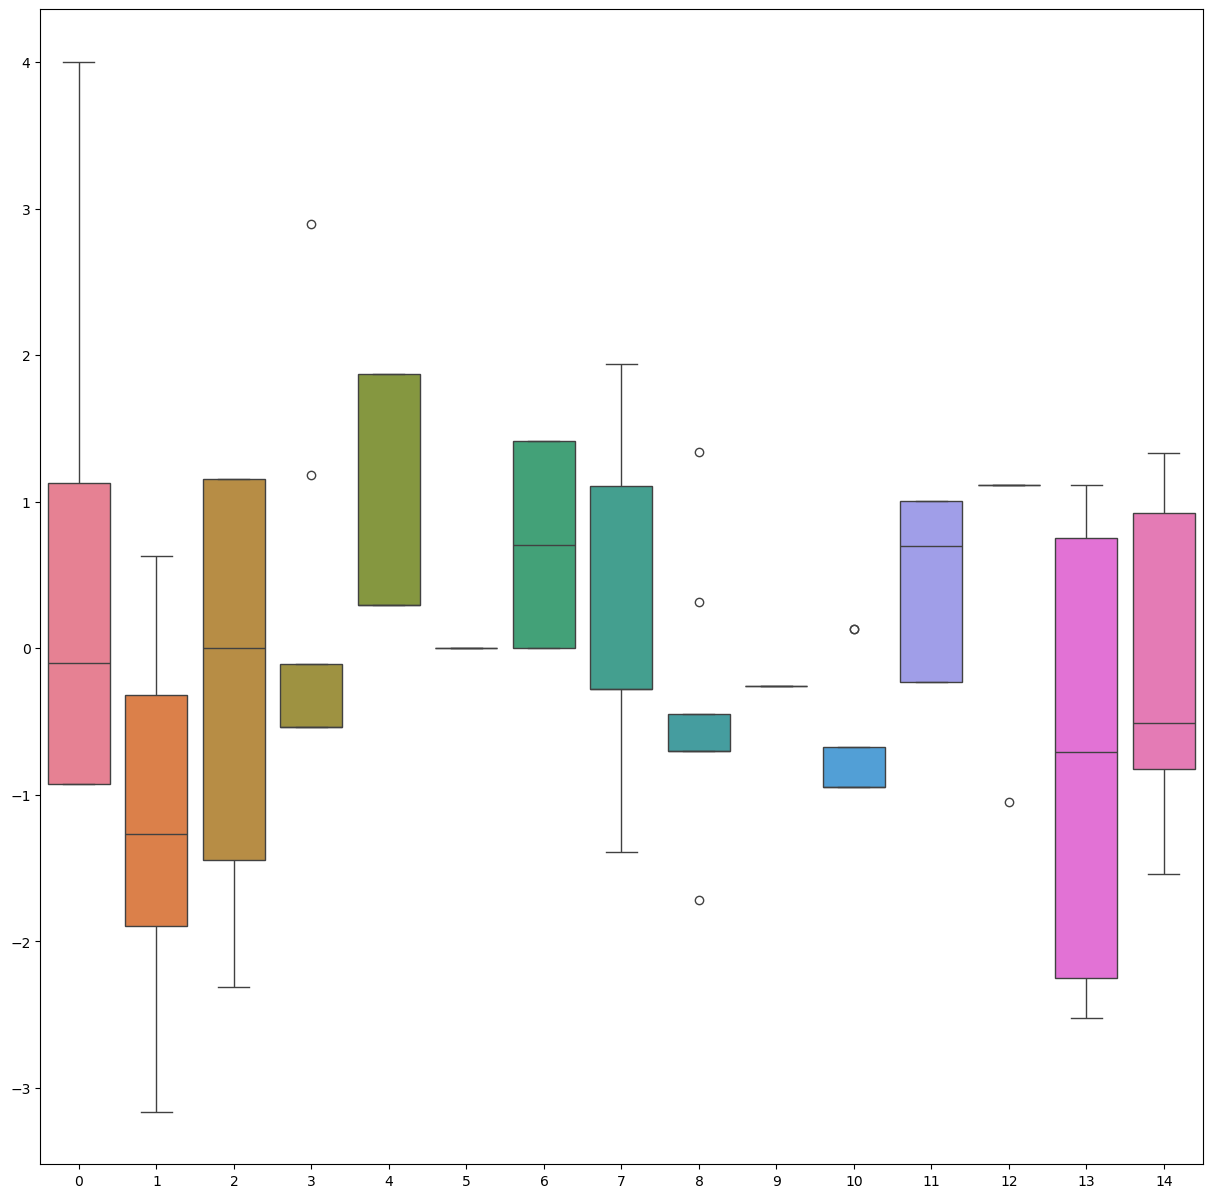

In [51]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_test_norm,ax=ax)

In [52]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_norm,Y_train.dropna())

LinearRegression()

In [53]:
print(regression.coef_)

[[ 6.09174647e-01 -5.07205469e-18 -4.77846044e-17  2.94638273e-16
  -7.18875381e-17 -2.47383308e-16  1.00105438e-16  1.88341462e-16
  -1.19465458e-17 -5.47060832e-17  2.76527754e-17  3.46767336e-16
   6.98792983e-17 -1.01038781e-16  8.66674560e-17]
 [ 7.70442602e-16  7.90569415e-01 -4.13827465e-16 -4.77888205e-16
  -5.64735913e-16 -2.22044605e-16  7.06150233e-16 -6.91351067e-16
  -1.76258950e-16  3.97760489e-16 -6.36402380e-16  1.86837556e-16
  -1.84946370e-17  6.92205041e-16 -9.95206477e-16]
 [ 2.02974765e-16 -2.80795484e-16  8.66025404e-01 -6.51694482e-16
   3.62803494e-16  1.11022302e-16  6.90431464e-16 -1.58657993e-16
  -3.00476391e-16 -2.41666345e-16  2.62889634e-16 -1.63807638e-16
   4.21757109e-17 -4.30627833e-17 -4.53135085e-16]
 [ 7.04187905e-16  2.37861003e-16 -1.19158685e-16  5.82961191e-01
  -4.79122459e-16  2.49800181e-16  4.78254141e-16 -5.98107879e-16
  -4.70247479e-17  1.76052047e-16 -7.25351336e-18  5.57385846e-18
  -4.88443053e-17  5.62564601e-16 -8.43180087e-16]
 [-2

In [54]:
reg_predict = regression.predict(X_test_norm)
reg_predict

array([[18.,  4.,  4.,  2.,  2.,  0.,  4.,  3.,  4.,  1.,  1.,  3.,  5.,
         5., 11.],
       [16.,  4.,  3.,  1.,  2.,  0.,  5.,  4.,  2.,  1.,  2.,  5.,  5.,
        15., 15.],
       [15.,  2.,  2.,  1.,  3.,  0.,  4.,  5.,  2.,  1.,  1.,  3.,  5.,
        14., 16.],
       [16.,  3.,  3.,  1.,  2.,  0.,  4.,  3.,  2.,  1.,  2.,  5.,  5.,
         6., 10.],
       [17.,  1.,  1.,  1.,  2.,  0.,  5.,  3.,  3.,  1.,  1.,  3.,  5.,
         5., 11.],
       [15.,  3.,  4.,  1.,  2.,  0.,  5.,  5.,  1.,  1.,  1.,  5.,  5.,
        14., 15.],
       [15.,  2.,  4.,  1.,  3.,  0.,  4.,  3.,  2.,  1.,  1.,  5.,  1.,
        10.,  9.],
       [15.,  2.,  1.,  3.,  3.,  0.,  5.,  2.,  2.,  1.,  1.,  4.,  5.,
        10., 12.]])

In [55]:
residual = Y_test.select_dtypes(include='float64').dropna()-reg_predict
residual

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.000000e+00,-1.776357e-15,4.440892e-16,-1.332268e-15,1.332268e-15,0.0,-2.664535e-15,-1.776357e-15,3.552714e-15,-2.220446e-16,-2.220446e-16,-5.329071e-15,0.000000e+00,-2.664535e-15,-8.881784e-15
5,0.000000e+00,-8.881784e-16,-8.881784e-16,-6.661338e-16,8.881784e-16,0.0,-1.776357e-15,0.000000e+00,4.440892e-16,2.220446e-16,1.554312e-15,-2.664535e-15,-1.776357e-15,-1.776357e-15,-7.105427e-15
14,0.000000e+00,2.886580e-15,-8.881784e-16,3.552714e-15,1.776357e-15,0.0,2.220446e-15,2.664535e-15,-3.108624e-15,4.440892e-16,-1.776357e-15,1.776357e-15,1.776357e-15,3.552714e-15,1.065814e-14
4,0.000000e+00,-4.440892e-16,-1.776357e-15,-2.220446e-16,6.661338e-16,0.0,0.000000e+00,8.881784e-16,4.440892e-16,0.000000e+00,-8.881784e-16,-3.552714e-15,-1.776357e-15,4.440892e-15,-7.105427e-15
1,0.000000e+00,-3.108624e-15,-3.108624e-15,-1.110223e-15,4.440892e-16,0.0,-1.776357e-15,-1.776357e-15,8.881784e-16,-4.440892e-16,0.000000e+00,-3.552714e-15,-3.552714e-15,3.552714e-15,-5.329071e-15
9,-1.776357e-15,8.881784e-16,0.000000e+00,1.776357e-15,8.881784e-16,0.0,0.000000e+00,1.776357e-15,-1.110223e-15,4.440892e-16,-8.881784e-16,-1.776357e-15,0.000000e+00,3.552714e-15,-1.776357e-15
24,0.000000e+00,2.220446e-16,-1.776357e-15,7.771561e-16,8.881784e-16,0.0,4.440892e-16,8.881784e-16,0.000000e+00,-2.220446e-16,-4.440892e-16,0.000000e+00,-2.220446e-16,5.329071e-15,0.000000e+00
11,-1.776357e-15,2.220446e-16,-8.881784e-16,1.776357e-15,8.881784e-16,0.0,0.000000e+00,-1.332268e-15,-2.664535e-15,0.000000e+00,-1.332268e-15,2.664535e-15,7.105427e-15,1.776357e-15,5.329071e-15


C:\Users\apurv\AppData\Local\Temp\ipykernel_43148\4192276842.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(residual,kind = 'kde')


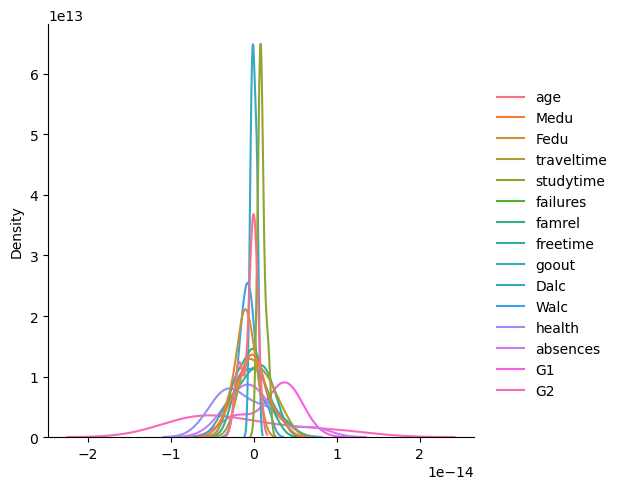

In [56]:
sns.displot(residual,kind = 'kde')

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(Y_test.dropna(),reg_predict))
print(mean_absolute_error(Y_test.dropna(),reg_predict))
print(r2_score(Y_test.dropna(),reg_predict))

6.328246290333504e-30
1.6200004300988743e-15
0.9333333333333333


> Handling Fail_1 Outliers

In [59]:
#Before Removing Outliers
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=Fail_1,ax=ax)

In [60]:
# Fail_1['studytime'].value_counts()

In [61]:
# Studytime_mean = round(Fail_1['studytime'].mean())
# Fail_1['studytime']=Fail_1['studytime'].replace(4,Studytime_mean)

In [62]:
# Fail_1['famrel'].value_counts()

In [63]:
# famrel_mean = round(Fail_1['famrel'].mean())
# Fail_1['famrel']=Fail_1['famrel'].apply(lambda x:x if x==famrel_mean else famrel_mean)

In [64]:
# famrel_mean = round(Fail_1['famrel'].mean())
# Fail_1['famrel']=Fail_1['famrel'].apply(lambda x:x if x==famrel_mean else famrel_mean)

In [65]:
# Fail_1['freetime'].value_counts()

In [66]:
# Freetime_mean = round(Fail_1['freetime'].mean())
# Fail_1['freetime']=Fail_1['freetime'].replace(1,Freetime_mean)

In [67]:
# Fail_1['absences'].value_counts()

In [68]:
# Absences_Mean = round(Fail_1['absences'].mean())
# Fail_1['absences'] = Fail_1['absences'].apply(lambda x:x if x<30 else Absences_Mean)

In [69]:
# Fail_1['Dalc'].value_counts()

In [70]:
# Dalc_Mean = round(Fail_1['Dalc'].mean())
# Fail_1['Dalc'] = Fail_1['Dalc'].apply(lambda x:x if x<4 else Dalc_Mean)

In [71]:
#After Removing Outliers
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=Fail_1,ax=ax)

In [72]:
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=Fail_2,ax=ax)

In [73]:
# sns.displot(data = Fail_1,kind='kde')

In [74]:
# sns.displot(data = Fail_2,kind='kde')

In [75]:
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=Fail_3,ax=ax)

In [76]:
# sns.displot(data = Fail_3,kind='kde')

In [77]:
# d = data.select_dtypes(include='int')
# d.corr()

In [78]:
# sns.pairplot(data.select_dtypes(include='int'))

> **Fail_1 Linear Regression**

In [80]:
# fail_1_X =  Fail_1.iloc[:,:-1]
# fail_1_Y = Fail_1.iloc[:,:-1]

In [81]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(fail_1_X,fail_1_Y,test_size=0.25,random_state=42)

In [82]:
# from sklearn.preprocessing import StandardScaler
# # from sklearn.preprocessing import StandardScaler

# scaler =  StandardScaler()
# X_train_norm = scaler.fit_transform(X_train.select_dtypes(include="float64"))

In [83]:
# X_test_norm=scaler.transform(X_test.select_dtypes(include='float64'))

In [84]:
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=X_train_norm,ax=ax)

In [85]:
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=X_test_norm,ax=ax)

In [86]:
# from sklearn.linear_model import LinearRegression
# regression = LinearRegression()
# regression.fit(X_train_norm,Y_train.select_dtypes(include="float64"))

In [87]:
# reg_predict = regression.predict(X_test_norm)
# reg_predict

In [88]:
# print(regression.coef_)

In [89]:
# residual = Y_test.select_dtypes(include='float64')-reg_predict
# residual

In [90]:
# sns.displot(residual,kind = 'kde')

In [91]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# print(mean_squared_error(Y_test.select_dtypes(include='float64'),reg_predict))
# print(mean_absolute_error(Y_test.select_dtypes(include='float64'),reg_predict))
# print(r2_score(Y_test.select_dtypes(include='float64'),reg_predict))

In [92]:
# fig,ax = plt.subplots(figsize = (15,15))
# sns.boxplot(data=X_test_norm,ax=ax)

In [93]:
# data['paid'].value_counts()

In [94]:
# Fail_0.where(data['paid']=='no').dropna()

> **In the above dataframe we can see that the students didn't paid their fees but they haven't failed in any subjects so we should try to help them**

In [96]:
# Fail_0.where(data['paid']=='yes').dropna()

In [97]:
# Fail_1.where(data['paid']=='no').dropna()

> **These Students failed in one subject and didn't paid the fees also we should talk to them and try understand their situations and help them**

In [99]:
# Fail_1.where(data['paid']=='yes').dropna()

> **These students need to be counciled so that we can help them so that they can perform better in comming exams**

In [101]:
# Fail_2.where(data['paid']=='no').dropna()

> **These Students didn't paid the fees and also failed in two subjects there might be somw serious issue which we need to find out **

In [103]:
# Fail_2.where(data['paid']=='yes').dropna()

In [104]:
# Fail_3.where(data['paid']=='no').dropna()

In [105]:
# Fail_3.where(data['paid']=='yes').dropna()

> **All the students in above three datasets are need to be counciled so that we can find out why they all are failing they all are at a very bad position**> 

In [107]:
# Parents_Edu = data[['Medu','Fedu','Mjob','Fjob','freetime','goout','health','absences','paid','failures']].where(data['Medu'].where(data['Fedu']>=1.0)>=1.0 ).dropna()
# Parents_Edu